In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

# Drapper Adder using Qiskit Runtime

In [2]:
# code of your proposal for draper adder
from qiskit import *
import numpy as np
from qiskit.circuit.library import QFT


def basis_encoding(n:int,value:int) -> QuantumCircuit:
    qc = QuantumCircuit(n)

    for i,j in enumerate(np.binary_repr(value,width=n)):
        if j == '1':
            qc.x(n-i-1)

    return qc.to_gate(label = "["+str(value)+"]")


def draper_adder(n:int, n1:int, n2:int) -> QuantumCircuit:
    """
     n : integer value that is the number of qubits.
     n1: integer value that is the first value for the adder.
     n2: integer value that is the second value for the adder.
     Return the quantum circuit
    """
    #quantum circuit
    val1 = QuantumRegister(n)
    val2 = QuantumRegister(n)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(val1,val2,cr)
    
    ## implementation of the draper adder consider n qubits for the basis encoding
    qc.append(basis_encoding(n,n1),val1)
    qc.append(basis_encoding(n,n2),val2)
    
    qc = qc.compose(QFT(num_qubits=n,inverse=False,name='QFT').to_gate(),val2 )


    for j in range(n):
        for k in range(n - j):
            lam = np.pi / (2**k)
            qc.cp(lam, val1[n-j-1], val2[n-j-k-1])
            
            
    qc = qc.compose(QFT(num_qubits=n,inverse=True,name='QFT_inverse').to_gate(),val2 )

    
    qc.measure(val2,cr)
    return qc

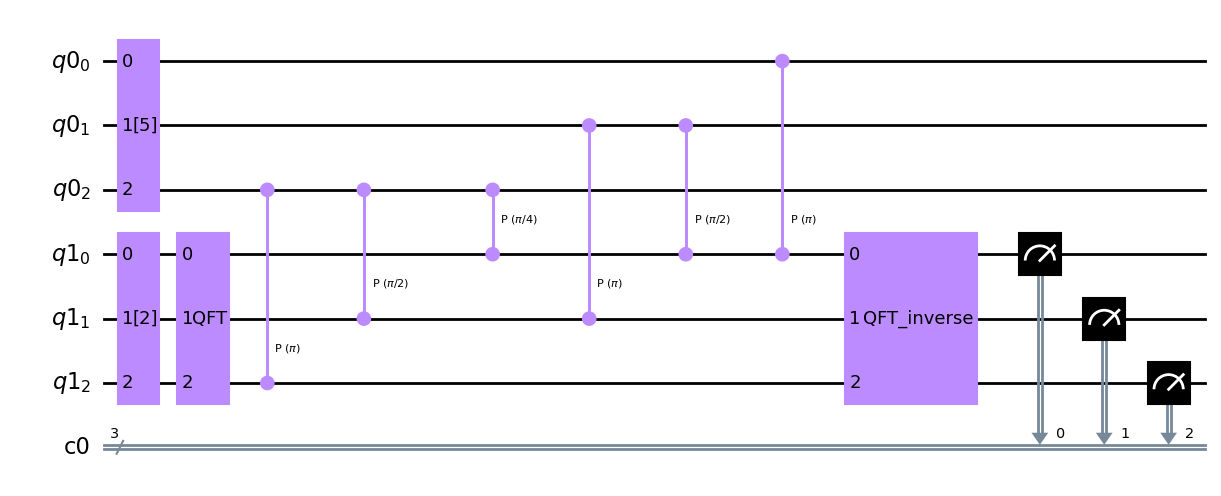

In [3]:
draper_adder(3, 5, 2).draw("mpl")

In [15]:
with Session(service, backend="ibmq_qasm_simulator") as session:
    sampler = Sampler(session=session)

    result = sampler.run(draper_adder(3, 5, 2)).result()
    print(f"result of the measurement :{result.quasi_dists}")

base_primitive._run_primitive:INFO:2024-01-23 16:42:48,300: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 1}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 0}, 'execution': {'shots': 4000, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


result of the measurement :[{7: 1.0}]


In [16]:
circuits = [draper_adder(3, 5, 2),draper_adder(3, 2, 2),draper_adder(3, 2, 1)]

In [17]:
result = sampler.run(circuits).result()
result

base_primitive._run_primitive:INFO:2024-01-23 16:43:03,353: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 1}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 0}, 'execution': {'shots': 4000, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


SamplerResult(quasi_dists=[{7: 1.0}, {4: 1.0}, {3: 1.0}], metadata=[{'shots': 4000, 'circuit_metadata': {}}, {'shots': 4000, 'circuit_metadata': {}}, {'shots': 4000, 'circuit_metadata': {}}])

# Qiskti runtime to execute  with hardware

In [ ]:
service = QiskituntimeService()
backend = service.backend("ibmq_qasm_simulator")
options = Options(optimization_level=3)
 
sampler = Sampler(options=options, backend=backend)
job = sampler.run(circuits=circuitos) 
probs =  job.result()

In [ ]:
service = QiskitRuntimeService(channel='ibm_quantum')
 
service.backends()

In [ ]:
backend = service.backend("ibm_osaka")

plot_gate_map(backend)

In [ ]:
service = QiskitRuntimeService()
options = Options(optimization_level=3)
 
sampler = Sampler(options=options, backend=backend)
job = sampler.run(circuits=circuitos) 
probs =  job.result()